# 📊 A Brief Outline Of The Dataset
This is a dataset of the modern-day Olympic Games, spanning and having records of games all the way from 1896, Athens Olympics to 2016, Rio Olympics.
The dataset contains **271116 instances and 15 attributes**. 

Each **instance** corresponds to an **individual athlete** competing in an **individual Olympic event (athlete-events)**. 
While the **attribute** consists of various inputs as follows (to name a few):
- ID - Unique number for each athlete
- Name - Athlete's name
- Sex - M or F
- Age - Integer
- Height - In centimeters
- Weight - In kilograms
- Team - Team name
- Medal- Gold, Silver, Bronze

# 📥 Loading The Data And Importing Libraries

In [3]:
!pip install pandas

In [4]:
!pip install plotly --quiet --upgrade
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from matplotlib.colors import ListedColormap

In [5]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
# For html export
import plotly.io as pio
pio.renderers.default = "notebook"

In [7]:
import pandas as pd

# Replace 'file.csv' with the path to your CSV file
df_1 = pd.read_csv('athlete_events.csv')

# Display the first few rows of the DataFrame
df_1.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [8]:
import pandas as pd

# Replace 'file.csv' with the path to your CSV file
df_2 = pd.read_csv('noc_regions.csv')

# Display the first few rows of the DataFrame
df_2.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


# ✔️ Data Preparation and Cleaning

#### The focus of this EDA project will solely be on the "Summer Olympics", Let us filter of all the "Winter Olympics Games" from our dataset and perform some basic analysis on dataset `df_1`

In [11]:
df_1= df_1[df_1["Season"]=="Summer"]
df_1.head(21).style.background_gradient(cmap='Reds',axis=None)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.000000,180.000000,80.000000,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,nan
1,2,A Lamusi,M,23.000000,170.000000,60.000000,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,nan
2,3,Gunnar Nielsen Aaby,M,24.000000,nan,nan,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,nan
3,4,Edgar Lindenau Aabye,M,34.000000,nan,nan,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
26,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.000000,168.000000,nan,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,nan
27,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.000000,168.000000,nan,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 4 x 100 metres Relay,nan
29,10,"Einar Ferdinand ""Einari"" Aalto",M,26.000000,nan,nan,Finland,FIN,1952 Summer,1952,Summer,Helsinki,Swimming,Swimming Men's 400 metres Freestyle,nan
31,12,Jyri Tapani Aalto,M,31.000000,172.000000,70.000000,Finland,FIN,2000 Summer,2000,Summer,Sydney,Badminton,Badminton Men's Singles,nan
32,13,Minna Maarit Aalto,F,30.000000,159.000000,55.500000,Finland,FIN,1996 Summer,1996,Summer,Atlanta,Sailing,Sailing Women's Windsurfer,nan
33,13,Minna Maarit Aalto,F,34.000000,159.000000,55.500000,Finland,FIN,2000 Summer,2000,Summer,Sydney,Sailing,Sailing Women's Windsurfer,nan


#### - Now Let us check all the column names in the dataset `df_1`, so that we get an idea of the values stored in the dataset.

In [13]:
df_1.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'],
      dtype='object')

#### - Okay, that gave us a good idea of the content of the dataset! Now let us count the number of columns in the dataset using Python's the `len()` function.

In [15]:
len(df_1.columns)

15

#### - Now, let us also verify the number of rows the the dataset holds:

In [17]:
len(df_1)

222552

#### - Now let us use `.info()` method to summarise the datatypes of all the 15 columns in our dataset.

In [19]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 222552 entries, 0 to 271110
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      222552 non-null  int64  
 1   Name    222552 non-null  object 
 2   Sex     222552 non-null  object 
 3   Age     213363 non-null  float64
 4   Height  170695 non-null  float64
 5   Weight  168698 non-null  float64
 6   Team    222552 non-null  object 
 7   NOC     222552 non-null  object 
 8   Games   222552 non-null  object 
 9   Year    222552 non-null  int64  
 10  Season  222552 non-null  object 
 11  City    222552 non-null  object 
 12  Sport   222552 non-null  object 
 13  Event   222552 non-null  object 
 14  Medal   34088 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 27.2+ MB


#### - Clearly, there are  **3** predominant **data type** in our dataset:
1.  **float64** (Decimal Numbers)
2.  **int64** (Integer Numbers)
3. **Object** (This is basically a Strings, I guess)

- Now, we will use the `.describe() ` method to calculate some of the basic statistical values like percentile, mean and std of the Dataset.
- Note that we have to use this step to find , flag and resolve any sort of anomaly in our dataset.

In [22]:
df_1.describe().style.background_gradient(cmap='Reds',axis=None)

,ID,Age,Height,Weight,Year
count,222552.000000,213363.000000,170695.000000,168698.000000,222552.000000
mean,67998.925712,25.674053,175.515551,70.689060,1976.317094
std,39139.038228,6.699839,10.914725,14.803940,30.942802
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34000.750000,21.000000,168.000000,60.000000,1956.000000
50%,68302.500000,24.000000,175.000000,70.000000,1984.000000
75%,101881.000000,28.000000,183.000000,79.000000,2000.000000
max,135568.000000,97.000000,226.000000,214.000000,2016.000000


#### Here's something that caught my eye from the above statistical values: 
- In the `Age` column, the minimum value is `10`, meaning that a kid as young as 10 years has participated in the one of the biggest sporting events on the planet.
- This is kind-of doesn't sound right for a multitude of reasons.
- Okay, I just verified this fact. Yes, so the youngest documented Olympian is 10-year-old Greek gymnast who goes by the name Dimitrios Loundras. He had participated in the 1896 Greek Olympics and managed to bag a Bronze Medal too!

#### Okay, now let us use the latter described methods and analyse dataset `df_2`

In [25]:
df_2.columns

Index(['NOC', 'region', 'notes'], dtype='object')

In [26]:
len(df_2.columns)

3

In [27]:
len(df_2)

230

In [28]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   NOC     230 non-null    object
 1   region  227 non-null    object
 2   notes   21 non-null     object
dtypes: object(3)
memory usage: 5.5+ KB


In [29]:
df_2.describe().style.set_properties(**{'background-color': '#DEF5E5',
                                    'color': 'black',
                                    'border': '0.5px  solid black'})

,NOC,region,notes
count,230,227,21
unique,230,206,21
top,AFG,Germany,Netherlands Antilles
freq,1,4,1


# 🔀 Merging The Two Datasets Into One

#### The steps that we'll use to merge the two datasets.
1. We first call the method `pandas.merge()`
2. We then passed in the arguments into this method `pd.merge(df_1, df_2,on='NOC', how='left')`. 
3. What this means is that; Since both the datasets(`df_1` & `df_2`) have a common column(`NOC`), we superimpose the two columns and the `how='left'` ensures that the remaining columns of dataset`df_2` get added to the left-side of dataset `df_1`

In [32]:
data_df= pd.merge(df_1, df_2, how='left',on='NOC')

In [33]:
data_df.head(21).style.background_gradient(cmap='Reds',axis=0)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.000000,180.000000,80.000000,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,nan,China,nan
1,2,A Lamusi,M,23.000000,170.000000,60.000000,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,nan,China,nan
2,3,Gunnar Nielsen Aaby,M,24.000000,nan,nan,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,nan,Denmark,nan
3,4,Edgar Lindenau Aabye,M,34.000000,nan,nan,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,nan
4,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.000000,168.000000,nan,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,nan,Netherlands,nan
5,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.000000,168.000000,nan,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 4 x 100 metres Relay,nan,Netherlands,nan
6,10,"Einar Ferdinand ""Einari"" Aalto",M,26.000000,nan,nan,Finland,FIN,1952 Summer,1952,Summer,Helsinki,Swimming,Swimming Men's 400 metres Freestyle,nan,Finland,nan
7,12,Jyri Tapani Aalto,M,31.000000,172.000000,70.000000,Finland,FIN,2000 Summer,2000,Summer,Sydney,Badminton,Badminton Men's Singles,nan,Finland,nan
8,13,Minna Maarit Aalto,F,30.000000,159.000000,55.500000,Finland,FIN,1996 Summer,1996,Summer,Atlanta,Sailing,Sailing Women's Windsurfer,nan,Finland,nan
9,13,Minna Maarit Aalto,F,34.000000,159.000000,55.500000,Finland,FIN,2000 Summer,2000,Summer,Sydney,Sailing,Sailing Women's Windsurfer,nan,Finland,nan


# ⚠️ Finding and Replacing The Null Values In Our Dataset

In [35]:
# Create a function to color cells based on the value
def color_missing(val):
    color = 'background-color: lightblue' if val else ''
    return color

# Apply the function to the entire DataFrame
null_df = data_df.isna().head(11).style.applymap(color_missing)
null_df


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True
2,False,False,False,False,True,True,False,False,False,False,False,False,False,False,True,False,True
3,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,True
5,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,True
6,False,False,False,False,True,True,False,False,False,False,False,False,False,False,True,False,True
7,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True
8,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True
9,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True


#### So `.isna()`  has retured a dataframe having bool values. Neverthless, since our dataset is quite large this output is difficult to interpret and make sense of. So, let us try and make a few visualisations that will give us a clearer picture of the extent of missing values present in our dataset.

#### Ok, before plotting the visualisations there is one more thing that we can do: - Lets add up all the null values using the `.sum()` method

In [38]:
data_df.isnull().sum()

ID             0
Name           0
Sex            0
Age         9189
Height     51857
Weight     53854
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     188464
region       370
notes     218151
dtype: int64

#### A lot better! - So the missing values can be summarised as follows:
1. **Age:         9474**
2. **Height:     60171**
3. **Weight:     62875**
4. **Medal:     231333**
5. **Region       370**
6. **Notes     218151**

#### - Well I believe that the medals tally has a lot of `NAN` values due to the fact that there can be only three winners per sport. However, over hundreds of participants take part and compete for these three spots.

In [41]:
missing_percentage= 100*(data_df.isna().sum().sort_values(ascending=False)/len(data_df))
missing_percentage[missing_percentage!=0]
# So the .sort_values(ascending=False) sorts the values in descending order
# Then the missing_percentage[missing_percentage!=0] pulls out all the values that are not equal to zero and stores it in a list
#  This ensures that the abovee code prints out only the non zero values. In other words it only prints the instances where the data is actually missing!

notes     98.022485
Medal     84.683130
Weight    24.198390
Height    23.301071
Age        4.128923
region     0.166253
dtype: float64

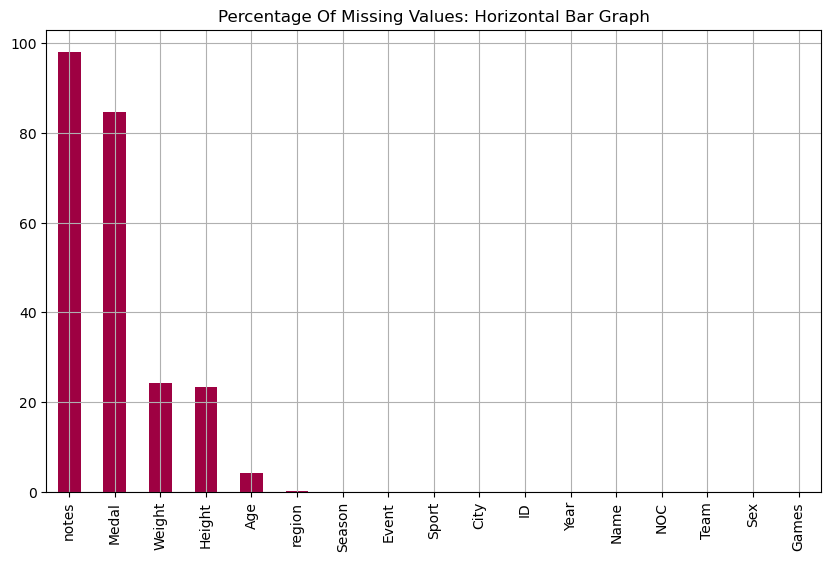

In [42]:
plt.title("Percentage Of Missing Values: Horizontal Bar Graph")
missing_percentage.plot(figsize=(10,6),kind="bar",grid=True,cmap='Spectral');

#### The notes column in this dataframe is not of much use to our EDA project so let us just remove it :

In [44]:
data_df.drop(["notes"],axis=1,inplace=True)

#### Now, Let us fill all the null values in columns `Age`, `Height` and `Weight` with the mean column parameters:

In [46]:
data_df['Age'].fillna(value=data_df['Age'].mean(),inplace=True)

In [47]:
data_df['Height'].fillna(value=data_df['Height'].mean(),inplace=True)

In [48]:
data_df['Weight'].fillna(value=data_df['Weight'].mean(),inplace=True)

In [49]:
data_df["region"].unique()

array(['China', 'Denmark', 'Netherlands', 'Finland', 'Norway', 'Romania',
       'Estonia', 'France', 'Morocco', 'Spain', 'Egypt', 'Iran',
       'Bulgaria', 'Italy', 'Chad', 'Azerbaijan', 'Sudan', 'Russia',
       'Argentina', 'Cuba', 'Belarus', 'Greece', 'Cameroon', 'Turkey',
       'Chile', 'Mexico', 'USA', 'Nicaragua', 'Hungary', 'Nigeria',
       'Algeria', 'Kuwait', 'Bahrain', 'Pakistan', 'Iraq', 'Syria',
       'Lebanon', 'Qatar', 'Malaysia', 'Germany', 'Canada', 'Ireland',
       'Australia', 'South Africa', 'Eritrea', 'Tanzania', 'Jordan',
       'Tunisia', 'Libya', 'Belgium', 'Djibouti', 'Palestine', 'Comoros',
       'Kazakhstan', 'Brunei', 'India', 'Saudi Arabia', 'Maldives',
       'Ethiopia', 'United Arab Emirates', 'Yemen', 'Indonesia',
       'Philippines', nan, 'Uzbekistan', 'Kyrgyzstan', 'Tajikistan',
       'Japan', 'Republic of Congo', 'Switzerland', 'Brazil', 'Monaco',
       'Israel', 'Uruguay', 'Sweden', 'Sri Lanka', 'Armenia',
       'Ivory Coast', 'Kenya', 'Ben

#### Okay, I guess I understood what `regions` actually stands for. Let us replace all the Null values in the `region` dataframe with a string that reads; `"Region Unknown"`.

In [51]:
data_df['region'].fillna(value="Region Unknown",inplace=True)

#### Since only the winners of their respective events will have either a `Gold`, a `Silver` or a `Bronze` medal against their names, Let us fill all the `Null Values` in the dataframe with a string that reads `"Medal Not Won"`.

In [53]:
data_df['Medal'].fillna(value="Medal Not Won",inplace=True)

In [54]:
data_df.head(11).style.background_gradient(cmap='Reds',axis=0)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region
0,1,A Dijiang,M,24.000000,180.000000,80.000000,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,Medal Not Won,China
1,2,A Lamusi,M,23.000000,170.000000,60.000000,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,Medal Not Won,China
2,3,Gunnar Nielsen Aaby,M,24.000000,175.515551,70.689060,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,Medal Not Won,Denmark
3,4,Edgar Lindenau Aabye,M,34.000000,175.515551,70.689060,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark
4,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.000000,168.000000,70.689060,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,Medal Not Won,Netherlands
5,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.000000,168.000000,70.689060,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 4 x 100 metres Relay,Medal Not Won,Netherlands
6,10,"Einar Ferdinand ""Einari"" Aalto",M,26.000000,175.515551,70.689060,Finland,FIN,1952 Summer,1952,Summer,Helsinki,Swimming,Swimming Men's 400 metres Freestyle,Medal Not Won,Finland
7,12,Jyri Tapani Aalto,M,31.000000,172.000000,70.000000,Finland,FIN,2000 Summer,2000,Summer,Sydney,Badminton,Badminton Men's Singles,Medal Not Won,Finland
8,13,Minna Maarit Aalto,F,30.000000,159.000000,55.500000,Finland,FIN,1996 Summer,1996,Summer,Atlanta,Sailing,Sailing Women's Windsurfer,Medal Not Won,Finland
9,13,Minna Maarit Aalto,F,34.000000,159.000000,55.500000,Finland,FIN,2000 Summer,2000,Summer,Sydney,Sailing,Sailing Women's Windsurfer,Medal Not Won,Finland


In [55]:
data_df.isnull().sum()

ID        0
Name      0
Sex       0
Age       0
Height    0
Weight    0
Team      0
NOC       0
Games     0
Year      0
Season    0
City      0
Sport     0
Event     0
Medal     0
region    0
dtype: int64

#### Leaving the `Null Values` in the region column as it is. We will look at it later on.

#### Checking if our dataset has any duplicate values (The entire row has the same values) using the `duplicated()` method.

In [58]:
data_df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
222547    False
222548    False
222549    False
222550    False
222551    False
Length: 222552, dtype: bool

In [59]:
data_df.duplicated().sum()

1385

#### Let's drop these duplicate values using the `.drop_duplicates()` method. The argument`keep = 'First'`will ensure that pandas deletes all the duplicate rows, but for the first one!

In [61]:
data_df.drop_duplicates(keep='first',inplace=True,)

In [62]:
data_df.duplicated().sum()

0

#### Okay, before we head to the `Data Visualisation`section, there yet another anomaly  that requires our attention.

#### To showcase this anomaly, let me get all the all-time gold medals won by India in the Olympics

In [65]:
data_df[(data_df["Team"]=="India") & (data_df["Medal"]=="Gold")]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region
4186,2699,Shaukat Ali,M,30.000000,175.515551,70.68906,India,IND,1928 Summer,1928,Summer,Amsterdam,Hockey,Hockey Men's Hockey,Gold,India
4190,2703,Syed Mushtaq Ali,M,22.000000,165.000000,61.00000,India,IND,1964 Summer,1964,Summer,Tokyo,Hockey,Hockey Men's Hockey,Gold,India
4460,2864,Richard James Allen,M,25.000000,172.000000,70.68906,India,IND,1928 Summer,1928,Summer,Amsterdam,Hockey,Hockey Men's Hockey,Gold,India
4461,2864,Richard James Allen,M,30.000000,172.000000,70.68906,India,IND,1932 Summer,1932,Summer,Los Angeles,Hockey,Hockey Men's Hockey,Gold,India
4462,2864,Richard James Allen,M,34.000000,172.000000,70.68906,India,IND,1936 Summer,1936,Summer,Berlin,Hockey,Hockey Men's Hockey,Gold,India
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191759,117232,Dung Dung Sylvanus,M,31.000000,160.000000,62.00000,India,IND,1980 Summer,1980,Summer,Moskva,Hockey,Hockey Men's Hockey,Gold,India
193964,118553,Carlyle Carrol Tapsell,M,23.000000,182.000000,70.68906,India,IND,1932 Summer,1932,Summer,Los Angeles,Hockey,Hockey Men's Hockey,Gold,India
193965,118553,Carlyle Carrol Tapsell,M,27.000000,182.000000,70.68906,India,IND,1936 Summer,1936,Summer,Berlin,Hockey,Hockey Men's Hockey,Gold,India
205949,125560,"Max ""Maxie"" Vaz",M,25.674053,175.515551,70.68906,India,IND,1948 Summer,1948,Summer,London,Hockey,Hockey Men's Hockey,Gold,India


In [66]:
len(data_df[(data_df["Team"]=="India") & (data_df["Medal"]=="Gold")])

131

#### 131 gold medals! Now a quick Google search will return the fact that India has not won over 131 Gold medals in the Olympics.

#### Our dataset wrong? Well not exactly, here, instead of tallying the medal of a team event as one medal to the nation,`Pandas` is counting and giving us a summation of all the individials who were a part of the team.

#### For now let us leave this as it as. This will not have a big impact on our visulisations as very `country` in this dataset will have this advantage!

# 📈 Exploratory Analysis and Visualisations

### 1. The  Nations Have Sent Maximum Number Of Athletes Over The Years

In [72]:
!pip install wordcloud --upgrade --quiet

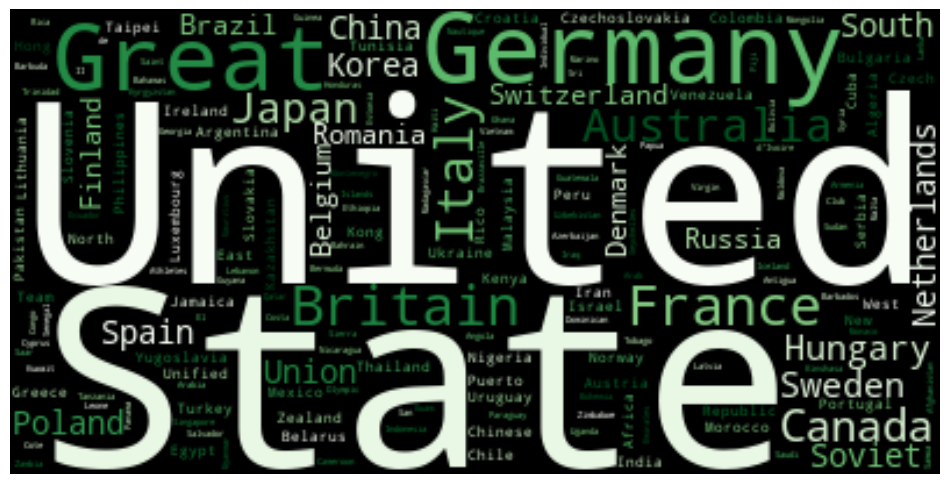

In [73]:
# We will first join all the instances of all the teams into a single string and store it in the variable "countries".
countries = " ".join(n for n in data_df['Team'])
from wordcloud import WordCloud
plt.figure(figsize=(12, 11))
wc = WordCloud(background_color='black',colormap='Greens',collocations=False).generate(countries)
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

#### That indicates we have more players from United States,Great Britain, France, Germany, Spain, Italy, Japan, Canada, the Netherlands etc among other places.

In [75]:
#Lets verify the above word cloud using this simple code:
count= data_df['Team'].value_counts() 
count.head(20)

Team
United States    14277
Great Britain    10169
France            9850
Italy             8004
Germany           7282
Australia         6975
Canada            6636
Japan             6213
Hungary           6034
Sweden            5773
Netherlands       4993
Spain             4830
Poland            4781
Soviet Union      4584
China             4179
Switzerland       3868
Romania           3722
Brazil            3708
South Korea       3584
Russia            3528
Name: count, dtype: int64

#### Yes, this tallies quite exactly with the output shown in the `Word Cloud`.

### 2. The Overall Spread Of The Age Of Athletes In The Summer Olympics

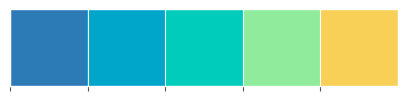

In [78]:
# Setting a theme for the visualizations
theme = ["#2C7BB6", "#00A6CA", "#00CCBC", "#90EB9D", "#F9D057"]

# Applying the theme
plt.style.use(['ggplot'])
sns.palplot(sns.color_palette(theme))
palette = sns.set_palette(sns.color_palette(theme))
plt.show()

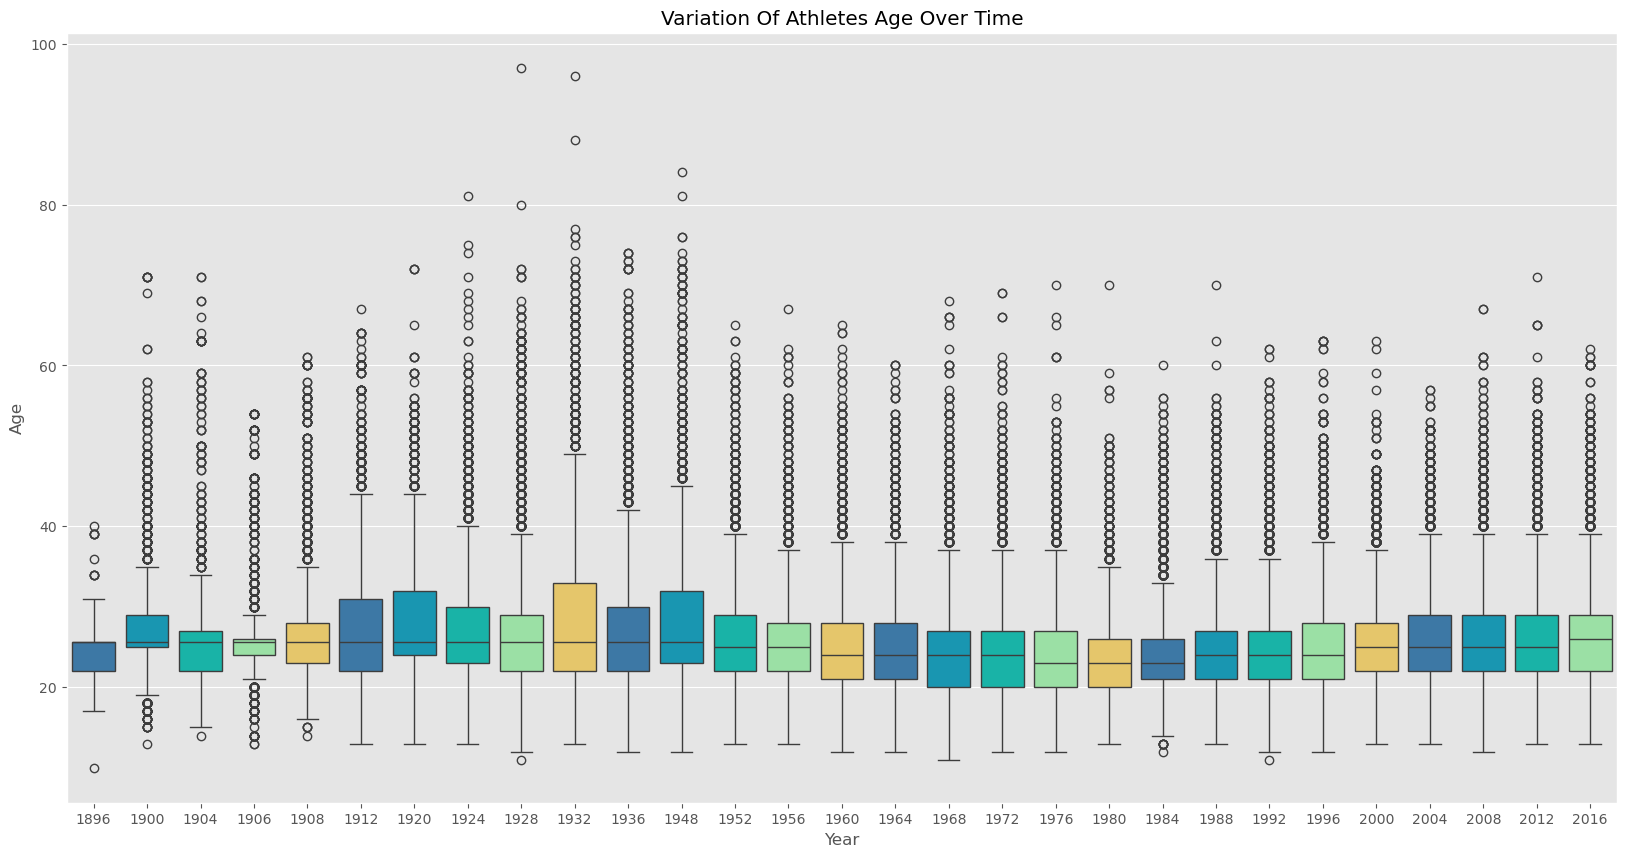

In [79]:
plt.figure(figsize=(20, 10))
sns.boxplot(x='Year', y='Age', data=data_df, palette=theme)
plt.title('Variation Of Athletes Age Over Time');

**Inference**:

**Inference:** We see that the median age of athletes has been  around 25 years for most of the Olympic games over period of 100 years.

### 3. The Overall Trend Of The Summer Olympics Over The Years

In [83]:
trend_df= data_df.groupby('Year').count()['ID'].reset_index()
trend_df.rename(columns={"ID":"Count"},inplace=True)
trend_df.head().style.set_properties(**{'background-color': '#DEF5E5',
                                    'color': 'black',
                                    'border': '0.5px  solid black'})

,Year,Count
0,1896,380
1,1900,1898
2,1904,1301
3,1906,1733
4,1908,3069


In [84]:
import plotly.io as pio
pio.renderers.default = "notebook"  # or "iframe" if necessary

In [85]:
import plotly.io as pio
pio.renderers.default = 'iframe'

# Plotting Code
line_colors = ["#14cc60", "#036d19", "#09a129"]
fig = px.line(trend_df, x='Year', y='Count', title="<b>The Variation In Participants Over The Years</b>",
              markers=True, color_discrete_sequence=line_colors, template="none")

fig.update_layout(plot_bgcolor="whitesmoke")
fig.show()

#### Making histogram for the above plot as it will give us a better picture of the same than a line plot.

In [87]:
line_colors = ["#ff7f0e", "#d62728", "#ffbb78"]
fig=px.histogram(trend_df,x='Year',y='Count',title="<b>The Variation In Participants Over The Years</b>",nbins=70,color_discrete_sequence=line_colors,template = "none")
fig.update_layout(plot_bgcolor = " whitesmoke")
fig.show()

#### **Inference:** Even though we see that the overall trends has been gradually tending upwards over the years, we can clearly see that there is a sudden drop in the number of participants in the years 1932, 1956 and 1980. We will try to find the reason for this drop and address it in the next sections.

### 4. The Variation Female Participants Over The Years In The Olympics

In [90]:
female_df= data_df[data_df["Sex"]=="F"]
female_df

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region
4,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,70.68906,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,Medal Not Won,Netherlands
5,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,70.68906,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 4 x 100 metres Relay,Medal Not Won,Netherlands
8,13,Minna Maarit Aalto,F,30.0,159.0,55.50000,Finland,FIN,1996 Summer,1996,Summer,Atlanta,Sailing,Sailing Women's Windsurfer,Medal Not Won,Finland
9,13,Minna Maarit Aalto,F,34.0,159.0,55.50000,Finland,FIN,2000 Summer,2000,Summer,Sydney,Sailing,Sailing Women's Windsurfer,Medal Not Won,Finland
33,21,Ragnhild Margrethe Aamodt,F,27.0,163.0,70.68906,Norway,NOR,2008 Summer,2008,Summer,Beijing,Handball,Handball Women's Handball,Gold,Norway
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222530,135553,Galina Ivanovna Zybina (-Fyodorova),F,33.0,168.0,80.00000,Soviet Union,URS,1964 Summer,1964,Summer,Tokyo,Athletics,Athletics Women's Shot Put,Bronze,Russia
222541,135560,Stavroula Zygouri,F,36.0,171.0,63.00000,Greece,GRE,2004 Summer,2004,Summer,Athina,Wrestling,"Wrestling Women's Middleweight, Freestyle",Medal Not Won,Greece
222544,135563,Olesya Nikolayevna Zykina,F,19.0,171.0,64.00000,Russia,RUS,2000 Summer,2000,Summer,Sydney,Athletics,Athletics Women's 4 x 400 metres Relay,Bronze,Russia
222545,135563,Olesya Nikolayevna Zykina,F,23.0,171.0,64.00000,Russia,RUS,2004 Summer,2004,Summer,Athina,Athletics,Athletics Women's 4 x 400 metres Relay,Silver,Russia


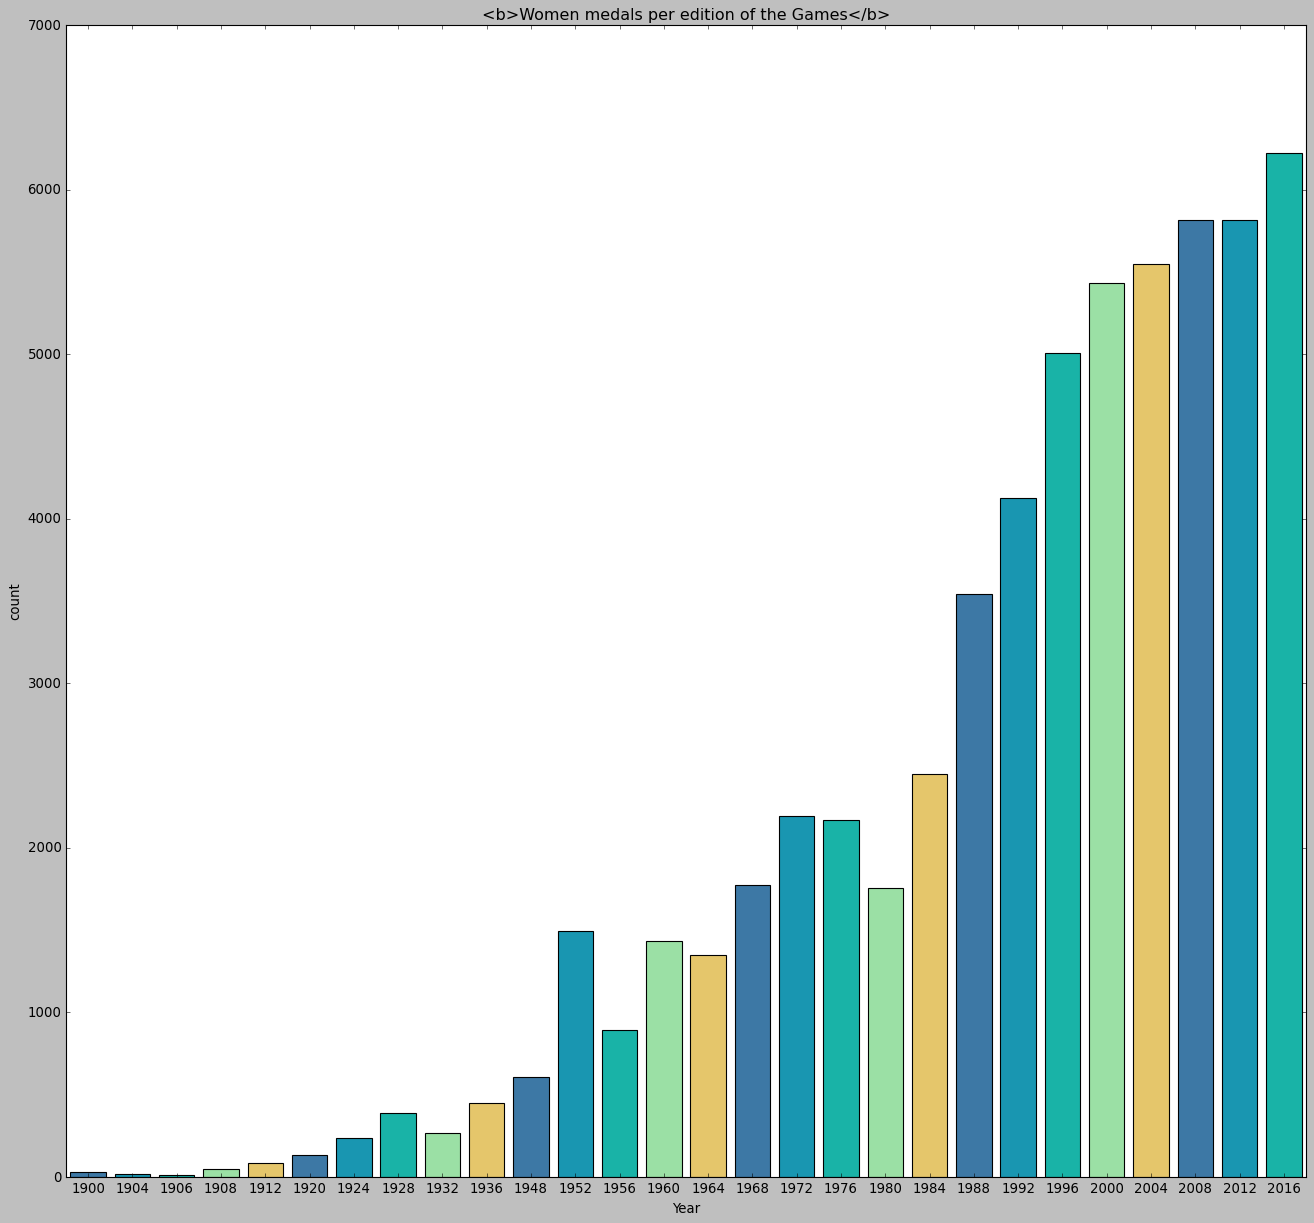

In [91]:
plt.style.use(['classic'])
plt.figure(figsize=(20,18 ))
sns.countplot(x='Year', data=female_df, palette=theme)
plt.title('<b>Women medals per edition of the Games</b>');

#### **Inference:** We see that the participation of women has been consistently on the rise over the years.

### 5. The Variation Female Participants In Comparsion To Male Participants Over The Years

In [94]:
gender_trend_df=data_df.groupby(['Sex','Year']).count().reset_index()
gender_trend_df.head(21).style.background_gradient(cmap='Reds',axis=0)

,Sex,Year,ID,Name,Age,Height,Weight,Team,NOC,Games,Season,City,Sport,Event,Medal,region
0,F,1900,33,33,33,33,33,33,33,33,33,33,33,33,33,33
1,F,1904,16,16,16,16,16,16,16,16,16,16,16,16,16,16
2,F,1906,11,11,11,11,11,11,11,11,11,11,11,11,11,11
3,F,1908,47,47,47,47,47,47,47,47,47,47,47,47,47,47
4,F,1912,87,87,87,87,87,87,87,87,87,87,87,87,87,87
5,F,1920,134,134,134,134,134,134,134,134,134,134,134,134,134,134
6,F,1924,234,234,234,234,234,234,234,234,234,234,234,234,234,234
7,F,1928,391,391,391,391,391,391,391,391,391,391,391,391,391,391
8,F,1932,265,265,265,265,265,265,265,265,265,265,265,265,265,265
9,F,1936,447,447,447,447,447,447,447,447,447,447,447,447,447,447


In [95]:
line_colors = ["#0a2e36",'#27fb6b']
a=px.line(gender_trend_df,x="Year",y="ID",color='Sex',markers=True,color_discrete_sequence=line_colors,template = "none")
a.update_layout(plot_bgcolor = "whitesmoke",
    title="<b>The Male Vs Female Participants Trend Over The Years</b>",
    yaxis_title="Number Of Participants"
)
a.show()

In [96]:
line_colors = ["#17becf", "#e377c2"]
fig = px.histogram(gender_trend_df, x="Year",y="ID",color='Sex',nbins=30, opacity=1,color_discrete_sequence=line_colors,template = "none")

fig.update_layout(plot_bgcolor = " whitesmoke",
    title="<b>The Male Vs Female Participants Trend Over The Years</b>",
    yaxis_title="Number Of Participants"
)
fig.show()

#### **Inference:** Even though the overall trend of both the graphs is on the rise. However, after the 1996 we see that there was a slight dip in the number of male participants.

### 6. The Top 10 Nations To Win Gold, Silver and Bronze Medals Respectively

In [99]:
medal_df=data_df[data_df['Medal']=="Gold"].groupby(["Team"]).count().sort_values(by='ID', ascending=False).reset_index()
medal_df.head(10).style.background_gradient(cmap='Reds',axis=0)

,Team,ID,Name,Sex,Age,Height,Weight,NOC,Games,Year,Season,City,Sport,Event,Medal,region
0,United States,2333,2333,2333,2333,2333,2333,2333,2333,2333,2333,2333,2333,2333,2333,2333
1,Soviet Union,830,830,830,830,830,830,830,830,830,830,830,830,830,830,830
2,Germany,564,564,564,564,564,564,564,564,564,564,564,564,564,564,564
3,Italy,492,492,492,492,492,492,492,492,492,492,492,492,492,492,492
4,Great Britain,481,481,481,481,481,481,481,481,481,481,481,481,481,481,481
5,Hungary,432,432,432,432,432,432,432,432,432,432,432,432,432,432,432
6,France,421,421,421,421,421,421,421,421,421,421,421,421,421,421,421
7,East Germany,337,337,337,337,337,337,337,337,337,337,337,337,337,337,337
8,Australia,336,336,336,336,336,336,336,336,336,336,336,336,336,336,336
9,Sweden,326,326,326,326,326,326,326,326,326,326,326,326,326,326,326


In [100]:
import plotly.express as px

# Custom color palette
line_colors = ["#1E90FF", "#32CD32", "#20B2AA", "#778899", "#FF8C00", "#DAA520", "#8B4513", "#4682B4", "#2E8B57", "#FF6347"]

# Creating the pie chart
gold_plot = px.pie(medal_df.head(10), values='ID', hole=0.65, names='Team',
                   title='<b>Top 10 Gold Winning Nations</b>',
                   color_discrete_sequence=line_colors, template="none",
                   labels={'ID': 'Gold Medals', 'Team': 'Country'})

# Adjusting trace properties for better readability
gold_plot.update_traces(textinfo='percent+label', textposition='outside', pull=[0.05] * 10)

# Updating layout with optimized margins and styling
gold_plot.update_layout(
    title_font_size=24,
    title_font_color="black",
    title_x=0.5,
    plot_bgcolor="whitesmoke",
    font=dict(size=14),
    showlegend=False,  # Option to remove legend if necessary
    margin=dict(t=50, b=50, l=50, r=50)  # Reduced margins for larger chart size
)

# Displaying the chart
gold_plot.show()

#### Now, Let Us find the Top 10 Silver Medal Earning Nations

In [102]:
silvermedal_df=data_df[data_df['Medal']=="Silver"].groupby(["Team"]).count().sort_values(by='ID', ascending=False).reset_index()
silvermedal_df.head(10).style.background_gradient(cmap='Reds',axis=0)

,Team,ID,Name,Sex,Age,Height,Weight,NOC,Games,Year,Season,City,Sport,Event,Medal,region
0,United States,1241,1241,1241,1241,1241,1241,1241,1241,1241,1241,1241,1241,1241,1241,1241
1,Soviet Union,635,635,635,635,635,635,635,635,635,635,635,635,635,635,635
2,Great Britain,576,576,576,576,576,576,576,576,576,576,576,576,576,576,576
3,Germany,513,513,513,513,513,513,513,513,513,513,513,513,513,513,513
4,France,485,485,485,485,485,485,485,485,485,485,485,485,485,485,485
5,Italy,467,467,467,467,467,467,467,467,467,467,467,467,467,467,467
6,Australia,450,450,450,450,450,450,450,450,450,450,450,450,450,450,450
7,Sweden,350,350,350,350,350,350,350,350,350,350,350,350,350,350,350
8,Hungary,328,328,328,328,328,328,328,328,328,328,328,328,328,328,328
9,China,299,299,299,299,299,299,299,299,299,299,299,299,299,299,299


In [103]:
import plotly.express as px

# Custom color palette
line_colors = ["#1E90FF", "#32CD32", "#20B2AA", "#778899", "#FF8C00", "#DAA520", "#8B4513", "#4682B4", "#2E8B57", "#FF6347"]

# Creating the pie chart for silver medals
silver_plot = px.pie(silvermedal_df.head(10), values='ID', hole=0.65, names='Team',
                     title='<b>Top 10 Silver Winning Nations</b>',
                     color_discrete_sequence=line_colors, template="none",
                     labels={'ID': 'Silver Medals', 'Team': 'Country'})

# Adjusting trace properties for better readability
silver_plot.update_traces(textinfo='percent+label', textposition='outside', pull=[0.05] * 10)

# Updating layout with optimized margins and styling
silver_plot.update_layout(
    title_font_size=24,
    title_font_color="black",
    title_x=0.5,
    plot_bgcolor="whitesmoke",
    font=dict(size=14),
    showlegend=False,  # Option to remove legend if necessary
    margin=dict(t=50, b=50, l=50, r=50)  # Reduced margins for larger chart size
)

# Displaying the chart
silver_plot.show()

#### Now Let Us find the Top 10 Bronze Medal Earning Nations

In [105]:
bronzemedal_df=data_df[data_df['Medal']=="Bronze"].groupby(["Team"]).count().sort_values(by='ID', ascending=False).reset_index()
bronzemedal_df.head(11).style.background_gradient(cmap='Reds',axis=0)

,Team,ID,Name,Sex,Age,Height,Weight,NOC,Games,Year,Season,City,Sport,Event,Medal,region
0,United States,1112,1112,1112,1112,1112,1112,1112,1112,1112,1112,1112,1112,1112,1112,1112
1,Germany,610,610,610,610,610,610,610,610,610,610,610,610,610,610,610
2,Soviet Union,596,596,596,596,596,596,596,596,596,596,596,596,596,596,596
3,Great Britain,541,541,541,541,541,541,541,541,541,541,541,541,541,541,541
4,Australia,504,504,504,504,504,504,504,504,504,504,504,504,504,504,504
5,France,502,502,502,502,502,502,502,502,502,502,502,502,502,502,502
6,Italy,425,425,425,425,425,425,425,425,425,425,425,425,425,425,425
7,Hungary,363,363,363,363,363,363,363,363,363,363,363,363,363,363,363
8,Netherlands,348,348,348,348,348,348,348,348,348,348,348,348,348,348,348
9,Japan,333,333,333,333,333,333,333,333,333,333,333,333,333,333,333


In [106]:
# Custom color palette
line_colors = ["#1E90FF", "#32CD32", "#20B2AA", "#778899", "#FF8C00", "#DAA520", "#8B4513", "#4682B4", "#2E8B57", "#FF6347"]

# Creating the pie chart for bronze medals
bronze_plot = px.pie(bronzemedal_df.head(10), values='ID', hole=0.65, names='Team',
                     title='<b>Top 10 Bronze Winning Nations</b>',
                     color_discrete_sequence=line_colors, template="none",
                     labels={'ID': 'Bronze Medals', 'Team': 'Country'})

# Adding percentage display to each slice
bronze_plot.update_traces(textinfo='percent+label',  textposition='outside', pull=[0.05] * 10)

# Updating layout with custom styling
bronze_plot.update_layout(
    title_font_size=24,
    title_font_color="black",
    title_x=0.5,
    plot_bgcolor="whitesmoke",
    font=dict(size=14),
    showlegend=False,  # Option to remove legend if necessary
    margin=dict(t=50, b=50, l=50, r=50)  # Reduced margins for larger chart size
)

# Displaying the chart
bronze_plot.show()

#### **Inference:** 
#### - We can clearly see that `The United States` is the undisputed leader all the three medal categories.
#### - The second and third positions have been captured by either `Germany` or `The Soviet Union` without any particular order.

### 7. The Year-Wise Medal Break-up Of The Top Performing Team: The United States

In [109]:
usa_medal_df=data_df[data_df['Team']=="United States"].reset_index()
usa_medal_df.head(11).style.background_gradient(cmap='Reds',axis=0)

,index,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region
0,124,84,Stephen Anthony Abas,M,26.000000,165.000000,55.000000,United States,USA,2004 Summer,2004,Summer,Athina,Wrestling,"Wrestling Men's Featherweight, Freestyle",Silver,USA
1,207,142,"David ""Dave"" Abbott",M,26.000000,183.000000,75.000000,United States,USA,1928 Summer,1928,Summer,Amsterdam,Athletics,"Athletics Men's 5,000 metres",Medal Not Won,USA
2,213,149,Mara Katherine Abbott,F,30.000000,163.000000,52.000000,United States,USA,2016 Summer,2016,Summer,Rio de Janeiro,Cycling,"Cycling Women's Road Race, Individual",Medal Not Won,USA
3,214,150,Margaret Ives Abbott (-Dunne),F,23.000000,175.515551,70.689060,United States,USA,1900 Summer,1900,Summer,Paris,Golf,Golf Women's Individual,Gold,USA
4,215,151,Mary Perkins Ives Abbott (Perkins-),F,42.000000,175.515551,70.689060,United States,USA,1900 Summer,1900,Summer,Paris,Golf,Golf Women's Individual,Medal Not Won,USA
5,217,153,Monica Cecilia Abbott,F,23.000000,191.000000,88.000000,United States,USA,2008 Summer,2008,Summer,Beijing,Softball,Softball Women's Softball,Silver,USA
6,242,165,Nia Nicole Abdallah,F,20.000000,175.000000,56.000000,United States,USA,2004 Summer,2004,Summer,Athina,Taekwondo,Taekwondo Women's Featherweight,Silver,USA
7,397,256,"Abdihakim ""Abdi"" Abdirahman",M,23.000000,178.000000,61.000000,United States,USA,2000 Summer,2000,Summer,Sydney,Athletics,"Athletics Men's 10,000 metres",Medal Not Won,USA
8,398,256,"Abdihakim ""Abdi"" Abdirahman",M,27.000000,178.000000,61.000000,United States,USA,2004 Summer,2004,Summer,Athina,Athletics,"Athletics Men's 10,000 metres",Medal Not Won,USA
9,399,256,"Abdihakim ""Abdi"" Abdirahman",M,31.000000,178.000000,61.000000,United States,USA,2008 Summer,2008,Summer,Beijing,Athletics,"Athletics Men's 10,000 metres",Medal Not Won,USA


In [110]:
yearly_medals = usa_medal_df.groupby(['Medal', 
'Year']).size().reset_index().pivot(columns='Medal', index='Year', values=0).reset_index()
yearly_medals.head(10).style.set_properties(**{'background-color': '#DEF5E5',
                                    'color': 'black',
                                    'border': '0.5px  solid black'})

Medal,Year,Bronze,Gold,Medal Not Won,Silver
0,1896,2,11,7,7
1,1900,13,18,69,14
2,1904,66,65,624,68
3,1906,6,12,57,6
4,1908,15,34,153,16
5,1912,36,46,257,25
6,1920,38,111,279,45
7,1924,49,91,273,34
8,1928,17,47,294,24
9,1932,61,67,355,42


In [111]:
import plotly.express as px

# Create the stacked bar chart with colors
fig = px.bar(yearly_medals, x="Year", barmode="stack", y=["Bronze", "Gold", "Silver"],
             color_discrete_map={'Gold': '#FFD700', 'Silver': '#C0C0C0', 'Bronze': '#CD7F32'})

# Update layout for background color and titles
fig.update_layout(
    plot_bgcolor="whitesmoke",
    title="<b>Medals-Breakup Over The Years</b>",
    yaxis_title="Medal Count",
    xaxis_title="Year",
    font=dict(size=12)
)

# Display the chart
fig.show()

#### **Inference:** 
#### - The Gold medals tally has always been more than Silver and Bronze medals
#### - We can see that over the years the United States has gradually increased their share of gold medals 
#### - This can be explained by increased sports expenditure under the term of President Theodore Roosevelt. The latter dominated the politics in America during the 1900s, and personally held a high regard for physical fitness and athleticism.

### 8. A Word-Cloud Visualizing Sports In Which India Has Won Medals Over The Years

In [114]:
indiasports_df= data_df[(data_df['Team']=="India")]

In [115]:
indiawin_df= indiasports_df[ (indiasports_df['Medal']=="Gold") | (indiasports_df['Medal']=="Silver") | (indiasports_df['Medal']=="Bronze")].sort_values(by="Medal",ascending=False)

In [116]:
indiawin_df.head().style.background_gradient(cmap='Reds',axis=0)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region
162491,99103,Rajyavardhan Singh Rathore,M,34.000000,188.000000,85.000000,India,IND,2004 Summer,2004,Summer,Athina,Shooting,Shooting Men's Double Trap,Silver,India
159207,97066,Norman Gilbert Pritchard (-Trevor),M,24.000000,175.515551,70.689060,India,IND,1900 Summer,1900,Summer,Paris,Athletics,Athletics Men's 200 metres Hurdles,Silver,India
181553,111028,Charanjit Singh,M,29.000000,175.000000,58.000000,India,IND,1960 Summer,1960,Summer,Roma,Hockey,Hockey Men's Hockey,Silver,India
181485,110974,"Pusarla Venkata ""P. V."" Sindhu",F,21.000000,179.000000,65.000000,India,IND,2016 Summer,2016,Summer,Rio de Janeiro,Badminton,Badminton Women's Singles,Silver,India
181627,111083,Jaswant Singh,M,29.000000,185.000000,77.000000,India,IND,1960 Summer,1960,Summer,Roma,Hockey,Hockey Men's Hockey,Silver,India


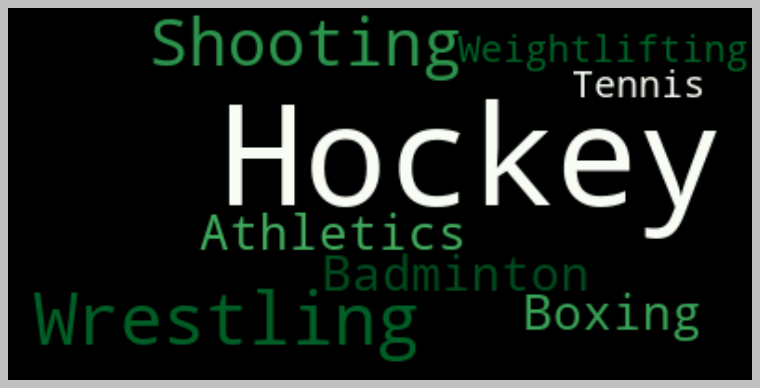

In [117]:
sports = " ".join(n for n in indiawin_df['Sport'])
from wordcloud import WordCloud
plt.figure(figsize=(12, 11))
wc = WordCloud(background_color='black',colormap='Greens',collocations=False).generate(sports)
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [118]:
indiawin_df["Sport"].unique()

array(['Shooting', 'Athletics', 'Hockey', 'Badminton', 'Wrestling',
       'Weightlifting', 'Boxing', 'Tennis'], dtype=object)

#### **Inference:** 
#### - India seems to have won medals across countable sports over the years. 
#### - Hockey accounts for maximum number of medals and this can be validated by the fact that it is the national sport of India.

### 9. Which Different Cities Hosted The Olympic Games Over The Years

In [121]:
!pip install geopandas --quiet
import geopandas as gpd
!pip install folium --quiet
import folium 
import matplotlib.pyplot as plt
import random
import json
!pip install geopy
from geopy.geocoders import Nominatim
!pip install shapely
from shapely.geometry import Point, LineString

In [122]:
city= data_df.City.unique()

In [123]:
city_list= city.tolist()
city_list

['Barcelona',
 'London',
 'Antwerpen',
 'Paris',
 'Los Angeles',
 'Helsinki',
 'Sydney',
 'Atlanta',
 'Stockholm',
 'Beijing',
 'Rio de Janeiro',
 'Athina',
 'Mexico City',
 'Munich',
 'Seoul',
 'Berlin',
 'Melbourne',
 'Roma',
 'Amsterdam',
 'Montreal',
 'Moskva',
 'Tokyo',
 'St. Louis']

In [124]:
# function that will return the coordinates of every city from out city_list 
def get_coordinates(city_list):
    """Takes a list of cities and returns a dictionary of the cities and their corresponding coordinates."""
    geolocator = Nominatim(user_agent="location script")
    dictionary = {}
    
    for city in city_list:
        try:
            location = geolocator.geocode(city)
        except:
            raise Exception("There was a problem with the getCoordinates function")
        coordinate_values = (location.longitude, location.latitude)  #in geopandas, the x value corresponds to the longitude while the y value, the latitude(Just in case you were wondering why it was *location.longitude, location.latitude* and not the other way round )
        dictionary[city] = coordinate_values #adding the coordinate pair to the dictionary at the end of every loop
    return dictionary #finally returns the dictionary

In [125]:
city_coords_dict = get_coordinates(city_list)
city_coords_dict

{'Barcelona': (2.1774322, 41.3828939),
 'London': (-0.14405508452768728, 51.4893335),
 'Antwerpen': (4.3997081, 51.2211097),
 'Paris': (2.3483915, 48.8534951),
 'Los Angeles': (-118.242766, 34.0536909),
 'Helsinki': (24.9427473, 60.1674881),
 'Sydney': (151.2082848, -33.8698439),
 'Atlanta': (-84.3902644, 33.7489924),
 'Stockholm': (18.0710935, 59.3251172),
 'Beijing': (116.412144, 40.190632),
 'Rio de Janeiro': (-43.2093727, -22.9110137),
 'Athina': (23.7348324, 37.9755648),
 'Mexico City': (-99.1331785, 19.4326296),
 'Munich': (11.5753822, 48.1371079),
 'Seoul': (126.9782914, 37.5666791),
 'Berlin': (13.3989367, 52.510885),
 'Melbourne': (144.9631732, -37.8142454),
 'Roma': (12.4829321, 41.8933203),
 'Amsterdam': (4.8924534, 52.3730796),
 'Montreal': (-73.5698065, 45.5031824),
 'Moskva': (37.6063916, 55.625578),
 'Tokyo': (139.7638947, 35.6768601),
 'St. Louis': (-90.1910154, 38.6280278)}

In [126]:
coordinates_df = pd.DataFrame(city_coords_dict)
coordinates_df.style.set_properties(**{'background-color': '#DEF5E5',
                                    'color': 'black',
                                    'border': '0.5px  solid black'})

,Barcelona,London,Antwerpen,Paris,Los Angeles,Helsinki,Sydney,Atlanta,Stockholm,Beijing,Rio de Janeiro,Athina,Mexico City,Munich,Seoul,Berlin,Melbourne,Roma,Amsterdam,Montreal,Moskva,Tokyo,St. Louis
0,2.177432,-0.144055,4.399708,2.348391,-118.242766,24.942747,151.208285,-84.390264,18.071093,116.412144,-43.209373,23.734832,-99.133178,11.575382,126.978291,13.398937,144.963173,12.482932,4.892453,-73.569806,37.606392,139.763895,-90.191015
1,41.382894,51.489334,51.221110,48.853495,34.053691,60.167488,-33.869844,33.748992,59.325117,40.190632,-22.911014,37.975565,19.432630,48.137108,37.566679,52.510885,-37.814245,41.893320,52.373080,45.503182,55.625578,35.676860,38.628028


In [127]:
# Transposing the above dataframe do that we have a vertical tabular column
coordinates1_df= coordinates_df.T
df=coordinates1_df.reset_index()
df.columns

Index(['index', 0, 1], dtype='object')

In [128]:
#Renaming The Columns
df.rename({"index":"City", 0: 'lon', 1: 'lat'},axis=1, inplace=True) 
df.columns

Index(['City', 'lon', 'lat'], dtype='object')

In [129]:
df.style.set_properties(**{'background-color': '#DEF5E5',
                                    'color': 'black',
                                    'border': '0.5px  solid black'})

,City,lon,lat
0,Barcelona,2.177432,41.382894
1,London,-0.144055,51.489334
2,Antwerpen,4.399708,51.221110
3,Paris,2.348391,48.853495
4,Los Angeles,-118.242766,34.053691
5,Helsinki,24.942747,60.167488
6,Sydney,151.208285,-33.869844
7,Atlanta,-84.390264,33.748992
8,Stockholm,18.071093,59.325117
9,Beijing,116.412144,40.190632


In [130]:
# Rearranging the columns 
df_1 = df[["lat","lon","City"]]
df.style.set_properties(**{'background-color': '#DEF5E5',
                                    'color': 'black',
                                    'border': '0.5px  solid black'})

,City,lon,lat
0,Barcelona,2.177432,41.382894
1,London,-0.144055,51.489334
2,Antwerpen,4.399708,51.221110
3,Paris,2.348391,48.853495
4,Los Angeles,-118.242766,34.053691
5,Helsinki,24.942747,60.167488
6,Sydney,151.208285,-33.869844
7,Atlanta,-84.390264,33.748992
8,Stockholm,18.071093,59.325117
9,Beijing,116.412144,40.190632


In [131]:
city_map= folium.Map(location=[41.382894, 2.177432], zoom_start=2.1, tiles="Stamen Terrain",control_scale=True)
folium.Marker([df_1.iloc[0,0],df_1.iloc[0,1]],
              popup= df["City"]).add_to(city_map)

In [132]:
for i in range(1,len(df_1)):
    location=[df_1.iloc[i,0], df_1.iloc[i,1]]
    folium.Marker(location, popup= df_1.iloc[i,2]).add_to(city_map)

In [133]:
import plotly.express as px
import pandas as pd

# Assuming df_1 is prepared with 'lat', 'lon', and 'City' columns
fig = px.scatter_mapbox(
    df_1, 
    lat="lat", 
    lon="lon", 
    hover_name="City", 
    zoom=1, 
    height=600,
    width=800,
    title="Olympic Host Cities"
)

# Set the mapbox style
fig.update_layout(mapbox_style="open-street-map")

# Show the figure
fig.show()


In [134]:
import plotly.io as pio
pio.renderers.default = 'jupyterlab'

### 15. A Visualization Showing Sports That Have Most Number Of Events

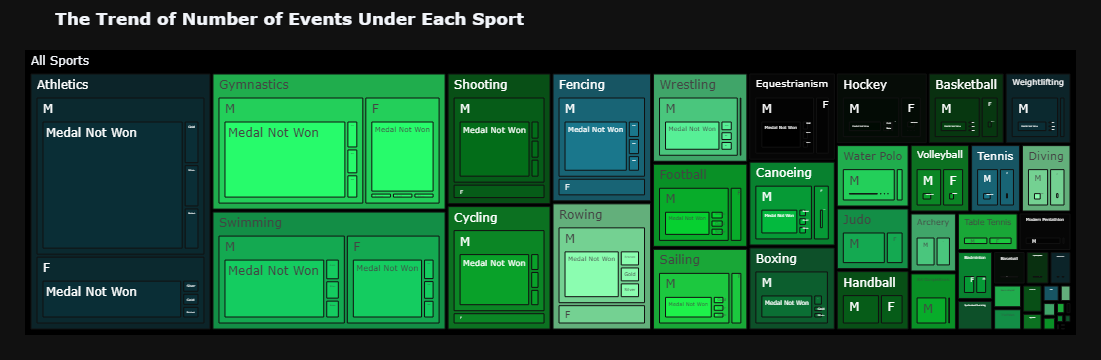

In [136]:
import plotly.express as px

# Color scheme for the visualization
line_colors = ["#0a2e36", "#27FB6B", "#14cc60", "#036d19", "#09a129"]

# Treemap showing the trend of number of events under each sport, divided by Sex and Medal
fig = px.treemap(data_df, 
                 title="<b>The Trend of Number of Events Under Each Sport</b>", 
                 path=[px.Constant("All Sports"), 'Sport', 'Sex', 'Medal'],
                 color_discrete_sequence=line_colors, 
                 template="plotly_dark")

# Updating trace colors and layout
fig.update_traces(root_color="Black")
fig.update_layout(margin=dict(t=50, l=25, r=25, b=25))

# Display the figure
fig.show()

# 📊 Summary of Key Insights

Here’s a brief overview of the primary conclusions drawn:

- **Word Cloud**: The "Word Cloud" reveals that a majority of athletes have represented developed countries like the United States, United Kingdom, France, Germany, Spain, Italy, Japan, Canada, and the Netherlands. This trend likely reflects substantial investments in athletes and sports infrastructure in these natioable.

- **Box Plot**: Analysis of the "Box Plot" shows that the median age of athletes has consistently been around 25-26 years over a 120-year span, aligning with peak athletic performance ages of 20-30.

- **Competitor Trends**: The number of Olympic participants has generally increased, with declines in 1932, 1956, and 1980 due to events like the Great Depression and geopolitical boycotts.

- **Women’s Participation**: Since the 1980s, female participation in the Olympics has increased steadily. Notably, the number of female athletes almost doubled in 1952 from the previous Olympics.

- **Gender Distribution**: Although both male and female participation has grown since 1896, male representation remains higher, partly due to historical male dominancmale athletes.

- **Top Gold Medal-Winning Nations**: The USA, Soviet Union, and Russia hold the top three positions in gold medals won, with the USA leading overall.

- **Top Silver and Bronze Medal-Winning Nations**: The USA and Soviet Union are consistently in the top three for silver and bronze medals, with Great Britain ranking high for silver and Germany for bronze.

- **Medal Count per Athlete (USA)**: American athletes have the highest medal count per person, with a preference for gold. Increased sports investment since President Theodore Roosevelt’s time has contributed to this improvement.

- **Female Athletes in the USA**: Recently, female American athletes have contributed more to the medal tally than their male counterparts.

- **India’s Medal-Winning Sports**: India's Olympic success is concentrated in sports like hockey, wrestling, and shooting. Hockey holds special national significance, while wrestling and archery are rooted in regional traditions.

- **Top Male Athletes by Medals**: The top three male athletes with the most Olympic medals are Michael Fred Phelps, Nikolay Andrianov, and Borys Shakhlin.

- **Top Female Athletes by Medals**: Larysa Latynina, Jennifer Thompson, and Dara Torres are the top three female athletes by total medals won.

- **Olympic Host Cities**: Most Olympic Games have been hosted by developed nations, with exceptions like Moscow (1980), Beijing (2008), and Rio de Janeiro (2016).

- **Sports with the Most Events**: Athletics, gymnastics, and swimming have the highest number of events, likely because they are foundational sports that have diversified over time.
